In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
sns.set()

In [13]:
soggetto = "soggetto_6"

In [14]:
# read soggetto_1_input.csv
df_input = pd.read_csv("Datasets/" + soggetto + '_input.csv', sep=',')
# remove SIGMA and bit_type columns
df_input = df_input.drop(['SIGMA', 'bit_type'], axis=1)
df_input

,bit,TrRi,RiTr,Plu,Ttra,Ttrb,Tr,MeTr,MoTr,RiRi,MoFo,Mmof,MoRi,MeRi,Ri,Comp
0,0.563910,0.76,1.00,0.83,0.05,0.00,0.03,0.94,1.00,0.18,0.88,1.00,0.81,0.01,0.04,0.75
1,0.436090,0.76,1.00,0.83,0.05,0.00,0.03,0.94,1.00,0.18,0.88,1.00,0.81,0.01,0.04,0.75
2,0.576923,0.03,1.00,1.00,0.00,0.03,0.77,0.02,0.17,0.00,0.17,0.17,0.17,0.72,0.20,0.83
3,0.423077,0.03,1.00,1.00,0.00,0.03,0.77,0.02,0.17,0.00,0.17,0.17,0.17,0.72,0.20,0.83
4,0.771208,0.61,0.24,0.03,0.00,0.00,0.51,0.20,0.26,0.21,0.47,0.26,0.47,0.51,0.13,0.46
5,0.228792,0.61,0.24,0.03,0.00,0.00,0.51,0.20,0.26,0.21,0.47,0.26,0.47,0.51,0.13,0.46
6,0.427481,0.72,0.58,1.00,0.21,0.09,0.58,0.17,0.00,0.39,0.39,0.21,0.18,0.72,0.94,0.60
7,0.572519,0.72,0.58,1.00,0.21,0.09,0.58,0.17,0.00,0.39,0.39,0.21,0.18,0.72,0.94,0.60
8,0.368421,0.83,0.47,0.71,0.18,0.00,0.94,0.29,0.39,0.20,0.18,0.20,0.00,0.71,0.83,0.60
9,0.631579,0.83,0.47,0.71,0.18,0.00,0.94,0.29,0.39,0.20,0.18,0.20,0.00,0.71,0.83,0.60


In [15]:
# read soggetto_1_targets.csv
df_target = pd.read_csv("Datasets/" + soggetto + '_targets.csv', sep=',')
df_target

,TrRi,RiTr,Plu,Ttra,Ttrb,Tr,MeTr,MoTr,RiRi,MoFo,Mmof,MoRi,MeRi,Ri,Comp
0,0.1568,-0.1600,0.0644,1.0940,1.1600,1.1204,-0.0808,-0.1600,0.9224,-0.0016,-0.1600,0.0908,1.1468,1.1072,0.1700
1,0.7600,1.0000,0.8300,0.0500,0.0000,0.0300,0.9400,1.0000,0.1800,0.8800,1.0000,0.8100,0.0100,0.0400,0.7500
2,1.0640,-0.1000,-0.1000,1.1000,1.0640,0.1760,1.0760,0.8960,1.1000,0.8960,0.8960,0.8960,0.2360,0.8600,0.1040
3,0.0300,1.0000,1.0000,0.0000,0.0300,0.7700,0.0200,0.1700,0.0000,0.1700,0.1700,0.1700,0.7200,0.2000,0.8300
4,0.5121,0.4714,0.4483,0.4450,0.4450,0.5011,0.4670,0.4736,0.4681,0.4967,0.4736,0.4967,0.5011,0.4593,0.4956
5,0.6100,0.2400,0.0300,0.0000,0.0000,0.5100,0.2000,0.2600,0.2100,0.4700,0.2600,0.4700,0.5100,0.1300,0.4600
6,0.7200,0.5800,1.0000,0.2100,0.0900,0.5800,0.1700,0.0000,0.3900,0.3900,0.2100,0.1800,0.7200,0.9400,0.6000
7,0.2272,0.4008,-0.1200,0.8596,1.0084,0.4008,0.9092,1.1200,0.6364,0.6364,0.8596,0.8968,0.2272,-0.0456,0.3760
8,0.8300,0.4700,0.7100,0.1800,0.0000,0.9400,0.2900,0.3900,0.2000,0.1800,0.2000,0.0000,0.7100,0.8300,0.6000
9,0.2525,0.5225,0.3425,0.7400,0.8750,0.1700,0.6575,0.5825,0.7250,0.7400,0.7250,0.8750,0.3425,0.2525,0.4250


In [16]:
# create neural network with an input layer, a hidden layer and an output layer respectively with 16, 15 and 15 neurons
model = keras.Sequential([
    layers.Dense(15, activation='tanh', input_shape=[len(df_input.keys())]),
    layers.Dense(15, activation='tanh'),
])

# compile the model with the Adam optimizer and the mean squared error loss function
model.compile(optimizer='Adam',
                loss='mse',
                metrics=['mae', 'mse'])

# train the model with the input and target data
history = model.fit(
    df_input, df_target,
    epochs=10000, verbose=0, shuffle=False)

In [17]:
# visualize the loss function
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
9995,0.002155,0.030931,0.002155,9995
9996,0.002155,0.030930,0.002155,9996
9997,0.002154,0.030929,0.002154,9997
9998,0.002154,0.030928,0.002154,9998
9999,0.002154,0.030927,0.002154,9999


<AxesSubplot: xlabel='epoch', ylabel='loss'>

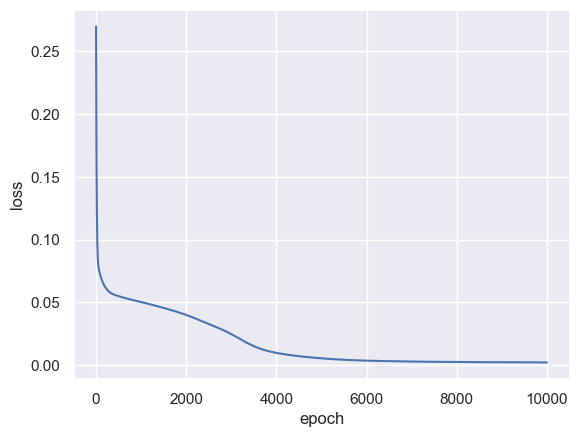

In [18]:
# visualize the loss function with seaborn
sns.lineplot(x='epoch', y='loss', data=hist)

In [19]:
# display model weights
weights = model.get_weights()

In [20]:
# convert weights to pandas dataframe
df_weights_h = pd.DataFrame(weights[0])
df_weights_o = pd.DataFrame(weights[2])

In [21]:
df_weights_o

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.814914,0.853000,0.221068,0.803849,0.576549,-0.677296,0.188556,1.094388,-0.071356,0.248313,-0.999186,-0.544728,-0.058256,-0.412372,-0.010802
1,-0.548027,-1.368610,-1.162329,1.690868,0.443941,0.771470,-0.863046,-0.172750,1.559468,0.060966,-0.534664,-0.342190,1.373153,0.507114,-0.235603
2,0.286279,-1.492473,-1.479447,-0.081625,0.544391,-0.304749,-0.039146,0.379896,0.950105,-1.019742,-0.085298,0.736830,-0.161423,0.567360,-0.267348
3,-0.054765,-1.072178,-0.068219,-0.646619,0.267211,1.672129,-1.353176,-2.387814,0.021567,-1.693660,-1.081848,-1.516981,1.180504,1.678382,-0.181177
4,0.411116,-0.489531,-0.043495,0.139949,-1.798836,-0.686727,-0.120581,0.127448,-0.281582,-0.368515,0.737286,-0.680969,-0.072725,-0.783591,0.192842
5,0.982366,0.265638,0.007055,0.708920,2.601161,-0.605178,1.280820,0.767453,0.244612,0.443429,0.628697,1.630417,-1.074425,1.392001,-0.238926
6,0.358660,-0.632509,-0.451147,1.764066,1.097821,-0.976741,0.172007,0.869330,0.364672,1.603018,1.427304,1.817354,-0.731435,-0.517156,-0.250816
7,0.410794,1.601149,1.556143,-2.567993,-1.737197,0.112706,0.038970,-0.387001,-2.349197,-0.606374,-1.294347,-1.519818,-0.637644,0.597597,0.455025
8,0.341975,-0.098559,0.254468,0.627653,1.286006,-1.697016,0.175435,-0.373711,-0.530194,-0.018590,-0.467244,-0.496762,-0.767047,0.265639,-0.139221
9,-0.615263,-0.752368,-0.854279,1.215145,1.913706,-0.337718,0.477871,-0.138395,0.899021,-0.417399,-0.615664,0.223902,-0.131448,0.738792,-0.355693


In [22]:
# save the two dataframes to csv files
df_weights_h.to_csv("Datasets/" + soggetto + '_weights_h.csv', index=False)
df_weights_o.to_csv("Datasets/" + soggetto + '_weights_o.csv', index=False)